In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas
import uproot
from yahist import Hist1D
from yahist.utils import plot_stack
from matplotlib.ticker import AutoMinorLocator
import os
from os import listdir
from os.path import isfile, join

In [2]:
# matplotlob params
params = {'legend.fontsize': 'x-large',
          'figure.figsize': (15, 5),
          'axes.labelsize': 'x-large',
          'axes.titlesize':'x-large',
          'xtick.labelsize':'x-large',
          'ytick.labelsize':'x-large'}
plt.rcParams.update(params)

In [3]:
# functions for reading files
path_to_mc_TTJets = "/hadoop/cms/store/user/jguiang/ttbarCR/babies/TTJets/"
mc_dirs_TTJets = [f.path for f in os.scandir(path_to_mc_TTJets) if f.is_dir() and 'v5-0-0' in f.path]
mc_files_list_TTJets = lambda i : [f for f in listdir(mc_dirs_TTJets[i]) if isfile(join(mc_dirs_TTJets[i], f))]
def mc_nevents_TTJets(i,j):
    return uproot.open(mc_dirs_TTJets[i] + '/' + mc_files_list_TTJets(i)[j]).get("n_events").allvalues[1]
n_events_list_TTJets = [sum([mc_nevents_TTJets(i,j) for j in range(len(mc_files_list_TTJets(i)))]) for i in range(len(mc_dirs_TTJets))]
def mc_files_TTJets(i,j):
    df = uproot.open(mc_dirs_TTJets[i] + '/' + mc_files_list_TTJets(i)[j]).get("tree").pandas.df(flatten=False)
    if ('DiLept_' in mc_dirs_TTJets[i]):
        df.insert(1,'xsec',87.3)
        df.insert(2,'n_events',n_events_list_TTJets[i])
    elif ('SingleLeptFromT_' in mc_dirs_TTJets[i]):
        df.insert(1,'xsec',182.7)
        df.insert(2,'n_events',n_events_list_TTJets[i])
    elif ('SingleLeptFromTbar_' in mc_dirs_TTJets[i]):
        df.insert(1,'xsec',182.7)
        df.insert(2,'n_events',n_events_list_TTJets[i])
        
    if ('Summer16' in mc_dirs_TTJets[i]):
        df.insert(3,'int_lumi',35920)
        df.insert(4,'year',2016)
    elif ('Fall17' in mc_dirs_TTJets[i]):
        df.insert(3,'int_lumi',41530)
        df.insert(4,'year',2017)
    elif ('Autumn18' in mc_dirs_TTJets[i]):
        df.insert(3,'int_lumi',59740)
        df.insert(4,'year',2018)
    return df

In [4]:
path_to_mc_ST = "/hadoop/cms/store/user/jguiang/ttbarCR/babies/ST/"
mc_dirs_ST = [f.path for f in os.scandir(path_to_mc_ST) if f.is_dir() and 'v5-0-0' in f.path]
mc_files_list_ST = lambda i : [f for f in listdir(mc_dirs_ST[i]) if isfile(join(mc_dirs_ST[i], f))]
def mc_nevents_ST(i,j):
    return uproot.open(mc_dirs_ST[i] + '/' + mc_files_list_ST(i)[j]).get("n_events").allvalues[1]
n_events_list_ST = [sum([mc_nevents_ST(i,j) for j in range(len(mc_files_list_ST(i)))]) for i in range(len(mc_dirs_ST))]
def mc_files_ST(i,j):
    df = uproot.open(mc_dirs_ST[i] + '/' + mc_files_list_ST(i)[j]).get("tree").pandas.df(flatten=False)
    if ('s-channel' in mc_dirs_ST[i]):
        df.insert(1,'xsec',3.7)
        df.insert(2,'n_events',n_events_list_ST[i])
    elif ('t-channel_antitop' in mc_dirs_ST[i]):
        df.insert(1,'xsec',80.95)
        df.insert(2,'n_events',n_events_list_ST[i])
    elif ('t-channel_top' in mc_dirs_ST[i]):
        df.insert(1,'xsec',136.02)
        df.insert(2,'n_events',n_events_list_ST[i])
    elif ('tW_antitop' in mc_dirs_ST[i]):
        df.insert(1,'xsec',19.6)
        df.insert(2,'n_events',n_events_list_ST[i])
    elif ('tW_top' in mc_dirs_ST[i]):
        df.insert(1,'xsec',19.6)
        df.insert(2,'n_events',n_events_list_ST[i])
        
    if ('Summer16' in mc_dirs_ST[i]):
        df.insert(3,'int_lumi',35920)
        df.insert(4,'year',2016)
    elif ('Fall17' in mc_dirs_ST[i]):
        df.insert(3,'int_lumi',41530)
        df.insert(4,'year',2017)
    elif ('Autumn18' in mc_dirs_ST[i]):
        df.insert(3,'int_lumi',59740)
        df.insert(4,'year',2018)
    return df

In [5]:
path_to_mc_VV = "/hadoop/cms/store/user/jguiang/ttbarCR/babies/VV/"
mc_dirs_VV = [f.path for f in os.scandir(path_to_mc_VV) if f.is_dir() and 'v5-0-0' in f.path]
mc_files_list_VV = lambda i : [f for f in listdir(mc_dirs_VV[i]) if isfile(join(mc_dirs_VV[i], f))]
def mc_nevents_VV(i,j):
    return uproot.open(mc_dirs_VV[i] + '/' + mc_files_list_VV(i)[j]).get("n_events").allvalues[1]
n_events_list_VV = [sum([mc_nevents_VV(i,j) for j in range(len(mc_files_list_VV(i)))]) for i in range(len(mc_dirs_VV))]
def mc_files_VV(i,j):
    df = uproot.open(mc_dirs_VV[i] + '/' + mc_files_list_VV(i)[j]).get("tree").pandas.df(flatten=False)
    if ('WWTo2L2Nu_' in mc_dirs_VV[i]):
        df.insert(1,'xsec',12.18)
        df.insert(2,'n_events',n_events_list_VV[i])
    elif ('WWToLNuQQ_' in mc_dirs_VV[i]):
        df.insert(1,'xsec',50.00)
        df.insert(2,'n_events',n_events_list_VV[i])
    elif ('WZTo1L1Nu2Q_' in mc_dirs_VV[i]):
        df.insert(1,'xsec',10.74)
        df.insert(2,'n_events',n_events_list_VV[i])
    elif ('WZTo1L3Nu_' in mc_dirs_VV[i]):
        df.insert(1,'xsec',3.05)
        df.insert(2,'n_events',n_events_list_VV[i])
    elif ('WZTo2L2Q_' in mc_dirs_VV[i]):
        df.insert(1,'xsec',5.60)
        df.insert(2,'n_events',n_events_list_VV[i])
    elif ('WZTo3LNu_' in mc_dirs_VV[i]):
        df.insert(1,'xsec',4.43)
        df.insert(2,'n_events',n_events_list_VV[i])
    elif ('ZZTo2L2Nu_' in mc_dirs_VV[i]):
        df.insert(1,'xsec',0.56)
        df.insert(2,'n_events',n_events_list_VV[i])
    elif ('ZZTo2L2Q_' in mc_dirs_VV[i]):
        df.insert(1,'xsec',3.22)
        df.insert(2,'n_events',n_events_list_VV[i])
    elif ('ZZTo2Q2Nu_' in mc_dirs_VV[i]):
        df.insert(1,'xsec',4.73)
        df.insert(2,'n_events',n_events_list_VV[i])
    elif ('ZZTo4L_' in mc_dirs_VV[i]):
        df.insert(1,'xsec',1.25)
        df.insert(2,'n_events',n_events_list_VV[i])
        
    if ('Summer16' in mc_dirs_VV[i]):
        df.insert(3,'int_lumi',35920)
        df.insert(4,'year',2016)
    elif ('Fall17' in mc_dirs_VV[i]):
        df.insert(3,'int_lumi',41530)
        df.insert(4,'year',2017)
    elif ('Autumn18' in mc_dirs_VV[i]):
        df.insert(3,'int_lumi',59740)
        df.insert(4,'year',2018)
    return df

In [6]:
path_to_mc_TTV = "/hadoop/cms/store/user/jguiang/ttbarCR/babies/TTV/"
mc_dirs_TTV = [f.path for f in os.scandir(path_to_mc_TTV) if f.is_dir() and 'v5-0-0' in f.path]
mc_files_list_TTV = lambda i : [f for f in listdir(mc_dirs_TTV[i]) if isfile(join(mc_dirs_TTV[i], f))]
def mc_nevents_TTV(i,j):
    return uproot.open(mc_dirs_TTV[i] + '/' + mc_files_list_TTV(i)[j]).get("n_events").allvalues[1]
n_events_list_TTV = [sum([mc_nevents_TTV(i,j) for j in range(len(mc_files_list_TTV(i)))]) for i in range(len(mc_dirs_TTV))]
def mc_files_TTV(i,j):
    df = uproot.open(mc_dirs_TTV[i] + '/' + mc_files_list_TTV(i)[j]).get("tree").pandas.df(flatten=False)
    if ('TTWJetsToLNu_' in mc_dirs_TTV[i]):
        df.insert(1,'xsec',0.20)
        df.insert(2,'n_events',n_events_list_TTV[i])
    elif ('TTWJetsToQQ_' in mc_dirs_TTV[i]):
        df.insert(1,'xsec',0.40)
        df.insert(2,'n_events',n_events_list_TTV[i])
    elif ('TTZToLLNuNu_' in mc_dirs_TTV[i]):
        df.insert(1,'xsec',0.25)
        df.insert(2,'n_events',n_events_list_TTV[i])
    elif ('TTZToQQ_' in mc_dirs_TTV[i]):
        df.insert(1,'xsec',0.53)
        df.insert(2,'n_events',n_events_list_TTV[i])
        
    if ('Summer16' in mc_dirs_TTV[i]):
        df.insert(3,'int_lumi',35920)
        df.insert(4,'year',2016)
    elif ('Fall17' in mc_dirs_TTV[i]):
        df.insert(3,'int_lumi',41530)
        df.insert(4,'year',2017)
    elif ('Autumn18' in mc_dirs_TTV[i]):
        df.insert(3,'int_lumi',59740)
        df.insert(4,'year',2018)
    return df

In [7]:
path_to_mc_VJets = "/hadoop/cms/store/user/jguiang/ttbarCR/babies/VJets/"
mc_dirs_VJets = [f.path for f in os.scandir(path_to_mc_VJets) if f.is_dir() and 'v5-0-0' in f.path]
mc_files_list_VJets = lambda i : [f for f in listdir(mc_dirs_VJets[i]) if isfile(join(mc_dirs_VJets[i], f))]
def mc_nevents_VJets(i,j):
    return uproot.open(mc_dirs_VJets[i] + '/' + mc_files_list_VJets(i)[j]).get("n_events").allvalues[1]
n_events_list_VJets = [sum([mc_nevents_VJets(i,j) for j in range(len(mc_files_list_VJets(i)))]) for i in range(len(mc_dirs_VJets))]
def mc_files_VJets(i,j):
    df = uproot.open(mc_dirs_VJets[i] + '/' + mc_files_list_VJets(i)[j]).get("tree").pandas.df(flatten=False)
    if ('DYJetsToLL_' in mc_dirs_VJets[i]):
        df.insert(1,'xsec',6021)
        df.insert(2,'n_events',n_events_list_VJets[i])
    elif ('W1JetsToLNu_NuPt-200_' in mc_dirs_VJets[i]):
        df.insert(1,'xsec',2.36)
        df.insert(2,'n_events',n_events_list_VJets[i])
    elif ('W1JetsToLNu_Tu' in mc_dirs_VJets[i]):
        df.insert(1,'xsec',11752)
        df.insert(2,'n_events',n_events_list_VJets[i])
    elif ('W2JetsToLNu_NuPt-200_' in mc_dirs_VJets[i]):
        df.insert(1,'xsec',4.95)
        df.insert(2,'n_events',n_events_list_VJets[i])
    elif ('W2JetsToLNu_Tu' in mc_dirs_VJets[i]):
        df.insert(1,'xsec',3841)
        df.insert(2,'n_events',n_events_list_VJets[i])
    elif ('W3JetsToLNu_NuPt-200_' in mc_dirs_VJets[i]):
        df.insert(1,'xsec',4.94)
        df.insert(2,'n_events',n_events_list_VJets[i])
    elif ('W3JetsToLNu_Tu' in mc_dirs_VJets[i]):
        df.insert(1,'xsec',1160)
        df.insert(2,'n_events',n_events_list_VJets[i])
    elif ('W4JetsToLNu_NuPt-200_' in mc_dirs_VJets[i]):
        df.insert(1,'xsec',8.83)
        df.insert(2,'n_events',n_events_list_VJets[i])
    elif ('W4JetsToLNu_Tu' in mc_dirs_VJets[i]):
        df.insert(1,'xsec',600)
        df.insert(2,'n_events',n_events_list_VJets[i])
        
    if ('Summer16' in mc_dirs_VJets[i]):
        df.insert(3,'int_lumi',35920)
        df.insert(4,'year',2016)
    elif ('Fall17' in mc_dirs_VJets[i]):
        df.insert(3,'int_lumi',41530)
        df.insert(4,'year',2017)
    elif ('Autumn18' in mc_dirs_VJets[i]):
        df.insert(3,'int_lumi',59740)
        df.insert(4,'year',2018)
    return df

In [8]:
path_to_data = "/hadoop/cms/store/user/jguiang/ttbarCR/babies/MuonEG/"
data_dirs = [f.path for f in os.scandir(path_to_data) if f.is_dir() and 'v5-0-0' in f.path]
data_files_list = lambda i : [f for f in listdir(data_dirs[i]) if isfile(join(data_dirs[i], f))]
def data_files(i,j):
    df = uproot.open(data_dirs[i] + '/' + data_files_list(i)[j]).get("tree").pandas.df(flatten=False)
    if ('2016' in data_dirs[i]):
        df.insert(1,'year',2016)
    elif ('2017' in data_dirs[i]):
        df.insert(1,'year',2017)
    elif ('2018' in data_dirs[i]):
        df.insert(1,'year',2018)
    return df

In [9]:
# making list w/ functions above
mc_list_TTJets = [mc_files_TTJets(i,j) for i in range(len(mc_dirs_TTJets)) for j in range(len(mc_files_list_TTJets(i)))]

In [10]:
mc_list_ST = [mc_files_ST(i,j) for i in range(len(mc_dirs_ST)) for j in range(len(mc_files_list_ST(i)))]

In [11]:
mc_list_VV = [mc_files_VV(i,j) for i in range(len(mc_dirs_VV)) for j in range(len(mc_files_list_VV(i)))]

In [12]:
mc_list_TTV = [mc_files_TTV(i,j) for i in range(len(mc_dirs_TTV)) for j in range(len(mc_files_list_TTV(i)))]

In [13]:
mc_list_VJets = [mc_files_VJets(i,j) for i in range(len(mc_dirs_VJets)) for j in range(len(mc_files_list_VJets(i)))]

In [14]:
data_list = [data_files(i,j) for i in range(len(data_dirs)) for j in range(len(data_files_list(i)))]

In [15]:
# concat to make df
mc_TTJets = pandas.concat(mc_list_TTJets)
mc_ST = pandas.concat(mc_list_ST)
mc_VV = pandas.concat(mc_list_VV)
mc_TTV = pandas.concat(mc_list_TTV)
mc_VJets = pandas.concat(mc_list_VJets)
data = pandas.concat(data_list)

In [16]:
mc_TTJets = mc_TTJets.drop_duplicates(subset=['leading_lep_pt', 'trailing_lep_pt'])
mc_ST = mc_ST.drop_duplicates(subset=['leading_lep_pt', 'trailing_lep_pt'])
mc_VV = mc_VV.drop_duplicates(subset=['leading_lep_pt', 'trailing_lep_pt'])
mc_TTV = mc_TTV.drop_duplicates(subset=['leading_lep_pt', 'trailing_lep_pt'])
mc_VJets = mc_VJets.drop_duplicates(subset=['leading_lep_pt', 'trailing_lep_pt'])
data = data.drop_duplicates(subset=['leading_lep_pt', 'trailing_lep_pt'])

In [17]:
year_ = 2016
mc_c_TTJets = mc_TTJets[mc_TTJets['year']==year_]
mc_c_ST = mc_ST[mc_ST['year']==year_]
mc_c_VV = mc_VV[mc_VV['year']==year_]
mc_c_TTV = mc_TTV[mc_TTV['year']==year_]
mc_c_VJets = mc_VJets[mc_VJets['year']==year_]
data_c = data[data['year']==year_]

In [18]:
xsec_weight_TTJets = mc_c_TTJets.gen_weight * mc_c_TTJets.xsec * mc_c_TTJets.int_lumi / mc_c_TTJets.n_events
comb_w_TTJets = mc_c_TTJets.mc_weight * mc_c_TTJets.mc_tight_btag_weight * xsec_weight_TTJets

In [19]:
xsec_weight_ST = mc_c_ST.gen_weight * mc_c_ST.xsec * mc_c_ST.int_lumi / mc_c_ST.n_events
comb_w_ST = mc_c_ST.mc_weight * mc_c_ST.mc_tight_btag_weight * xsec_weight_ST

In [20]:
xsec_weight_VV = mc_c_VV.gen_weight * mc_c_VV.xsec * mc_c_VV.int_lumi / mc_c_VV.n_events
comb_w_VV = mc_c_VV.mc_weight * mc_c_VV.mc_tight_btag_weight * xsec_weight_VV

In [21]:
xsec_weight_TTV = mc_c_TTV.gen_weight * mc_c_TTV.xsec * mc_c_TTV.int_lumi / mc_c_TTV.n_events
comb_w_TTV = mc_c_TTV.mc_weight * mc_c_TTV.mc_tight_btag_weight * xsec_weight_TTV

In [22]:
xsec_weight_VJets = mc_c_VJets.gen_weight * mc_c_VJets.xsec * mc_c_VJets.int_lumi / mc_c_VJets.n_events
comb_w_VJets = mc_c_VJets.mc_weight * mc_c_VJets.mc_tight_btag_weight * xsec_weight_VJets

In [23]:
integral_w = len(data_c)/(sum(comb_w_TTJets)+sum(comb_w_ST)+sum(comb_w_VV)+sum(comb_w_TTV)+sum(comb_w_VJets))
comb_w_TTJets *= integral_w
comb_w_ST *= integral_w
comb_w_VV *= integral_w
comb_w_TTV *= integral_w
comb_w_VJets *= integral_w

In [24]:
bins = np.linspace(0,50,51)
mc_p_TTJets = Hist1D(mc_c_TTJets.num_jets,weights=comb_w_TTJets,bins=bins)
mc_p_ST = Hist1D(mc_c_ST.num_jets,weights=comb_w_ST,bins=bins)
mc_p_VV = Hist1D(mc_c_VV.num_jets,weights=comb_w_VV,bins=bins)
mc_p_TTV = Hist1D(mc_c_TTV.num_jets,weights=comb_w_TTV,bins=bins)
mc_p_VJets = Hist1D(mc_c_VJets.num_jets,weights=comb_w_VJets,bins=bins)
data_p = Hist1D(data_c.num_jets,bins=bins)

In [25]:
import warnings
warnings.filterwarnings('ignore')

In [26]:
jet_weights = (data_p.counts[4:]) / (mc_p_TTJets.counts[4:]+mc_p_ST.counts[4:]+mc_p_VV.counts[4:]+mc_p_TTV.counts[4:]+mc_p_VJets.counts[4:])
jet_weights = np.array([1,1,1,1]+list(jet_weights))
jet_weights[13:] = 1
mc_c_TTJets['jet_weights'] = mc_c_TTJets.num_jets.apply(lambda x : jet_weights[x])
mc_c_ST['jet_weights'] = mc_c_ST.num_jets.apply(lambda x : jet_weights[x])
mc_c_VV['jet_weights'] = mc_c_VV.num_jets.apply(lambda x : jet_weights[x])
mc_c_TTV['jet_weights'] = mc_c_TTV.num_jets.apply(lambda x : jet_weights[x])
mc_c_VJets['jet_weights'] = mc_c_VJets.num_jets.apply(lambda x : jet_weights[x])

In [27]:
comb_w_TTJets *= mc_c_TTJets.jet_weights
comb_w_ST *= mc_c_ST.jet_weights
comb_w_VV *= mc_c_VV.jet_weights
comb_w_TTV *= mc_c_TTV.jet_weights
comb_w_VJets *= mc_c_VJets.jet_weights

Text(0.99, 1.01, '35.9 fb${}^\\mathregular{-1}$ (13 TeV)')

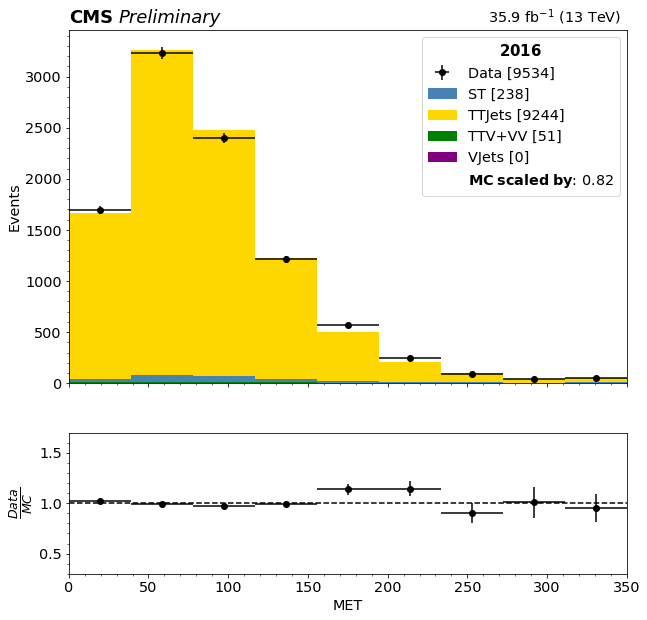

In [64]:
bins = np.linspace(0,350,10)
mc_p_TTJets = Hist1D(mc_c_TTJets.met,weights=comb_w_TTJets,bins=bins,label='TTJets ['+str(round(sum(comb_w_TTJets)))+']',color='gold')
mc_p_ST = Hist1D(mc_c_ST.met,weights=comb_w_ST,bins=bins,label='ST ['+str(round(sum(comb_w_ST)))+']',color='steelblue')
mc_p_VV = Hist1D(mc_c_VV.met,weights=comb_w_VV,bins=bins,label='VV ['+str(round(sum(comb_w_VV)))+']',color='red')
mc_p_TTV = Hist1D(mc_c_TTV.met,weights=comb_w_TTV,bins=bins,label='TTV+VV ['+str(round(sum(comb_w_TTV) + sum(comb_w_VV)))+']',color='green')
mc_p_VJets = Hist1D(mc_c_VJets.met,weights=comb_w_VJets,bins=bins,label='VJets ['+str(round(sum(comb_w_VJets)))+']',color='purple')
data_p = Hist1D(data_c.met,bins=bins,label='Data ['+str(len(data_c))+']',color='black')
mc_p_TV = mc_p_TTV + mc_p_VV
one = np.ones(50)
one_x = np.linspace(0,350)
#Plot
fig,(ax1,ax2) = plt.subplots(2,sharex=True,figsize=(10,10),gridspec_kw=dict(height_ratios=[5, 2]))
plot_stack([mc_p_VJets, mc_p_TV, mc_p_ST, mc_p_TTJets], ax=ax1, histtype='bar')
ax1.set_ylabel("Events")
ax2.set_xlabel(r"MET")
ax1.yaxis.set_minor_locator(AutoMinorLocator())
ax1.xaxis.set_minor_locator(AutoMinorLocator())
data_p.plot(ax=ax1,show_errors=True)
(data_p/(mc_p_TTJets+mc_p_ST+mc_p_TV+mc_p_VJets)).plot(ax=ax2,show_errors=True,label='')
ax2.set_ylabel(r"$\frac{Data}{MC}$",fontsize=18)
ax2.set_ylim(0.3,1.7)
ax2.yaxis.set_minor_locator(AutoMinorLocator())
ax2.xaxis.set_minor_locator(AutoMinorLocator())
plt.plot(one_x,one,'k--')
ax1.plot([],[],' ',label=r"$\bf{MC\hspace{0.25} scaled\hspace{0.25} by}$: %0.2f" % integral_w)
handles, labels = ax1.get_legend_handles_labels()
# sort both labels and handles by labels
labels, handles = zip(*sorted(zip(labels, handles), key=lambda t: t[0]))
labels, handles = list(labels), list(handles)
labels.append(labels.pop(0))
handles.append(handles.pop(0))
labels = tuple(labels)
handles = tuple(handles)
ax1.legend(handles, labels, title=r'$\bf{}$'.format(str(year_)),title_fontsize=15)
ax1.text(0.0, 1.01,"CMS", horizontalalignment="left", verticalalignment="bottom", transform=ax1.transAxes, weight="bold", size=18)
ax1.text(0.09, 1.01, "Preliminary", horizontalalignment="left", verticalalignment="bottom", transform=ax1.transAxes, style="italic", size=18)
ax1.text(0.99, 1.01,"%0.1f fb${}^\mathregular{-1}$ (13 TeV)" % (mc_c_TTJets.int_lumi.iloc[0] / 1000), horizontalalignment='right', verticalalignment='bottom', transform = ax1.transAxes, size="x-large")

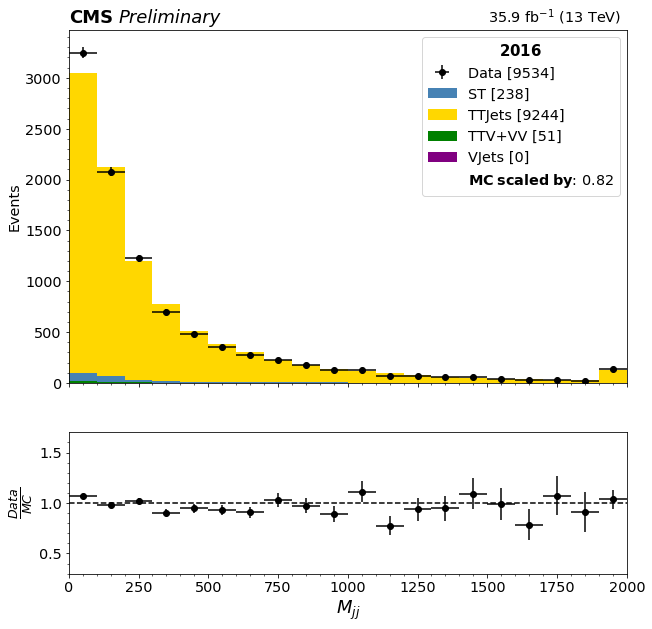

In [65]:
bins = np.linspace(0,2000,21)
mc_p_TTJets = Hist1D(mc_c_TTJets.vbs_dijet_mass,weights=comb_w_TTJets,bins=bins,label='TTJets ['+str(round(sum(comb_w_TTJets)))+']',color='gold')
mc_p_ST = Hist1D(mc_c_ST.vbs_dijet_mass,weights=comb_w_ST,bins=bins,label='ST ['+str(round(sum(comb_w_ST)))+']',color='steelblue')
mc_p_VV = Hist1D(mc_c_VV.vbs_dijet_mass,weights=comb_w_VV,bins=bins,label='VV ['+str(round(sum(comb_w_VV)))+']',color='red')
mc_p_TTV = Hist1D(mc_c_TTV.vbs_dijet_mass,weights=comb_w_TTV,bins=bins,label='TTV+VV ['+str(round(sum(comb_w_TTV) + sum(comb_w_VV)))+']',color='green')
mc_p_VJets = Hist1D(mc_c_VJets.vbs_dijet_mass,weights=comb_w_VJets,bins=bins,label='VJets ['+str(round(sum(comb_w_VJets)))+']',color='purple')
data_p = Hist1D(data_c.vbs_dijet_mass,bins=bins,label='Data ['+str(len(data_c))+']',color='black')
mc_p_TV = mc_p_TTV + mc_p_VV
one = np.ones(50)
one_x = np.linspace(0,2000)
#Plot
fig,(ax1,ax2) = plt.subplots(2,sharex=True,figsize=(10,10),gridspec_kw=dict(height_ratios=[5, 2]))
plot_stack([mc_p_VJets, mc_p_TV, mc_p_ST, mc_p_TTJets], ax=ax1, histtype='bar')
ax1.set_ylabel("Events")
ax2.set_xlabel(r"$M_{jj}$",fontsize=18)
ax1.yaxis.set_minor_locator(AutoMinorLocator())
data_p.plot(ax=ax1,show_errors=True)
(data_p/(mc_p_TTJets+mc_p_ST+mc_p_TV+mc_p_VJets)).plot(ax=ax2,show_errors=True,label='')
ax2.set_ylabel(r"$\frac{Data}{MC}$",fontsize=18)
ax2.set_ylim(0.3,1.7)
ax2.yaxis.set_minor_locator(AutoMinorLocator())
plt.plot(one_x,one,'k--')
ax1.plot([],[],' ',label=r"$\bf{MC\hspace{0.25} scaled\hspace{0.25} by}$: %0.2f" % integral_w)
handles, labels = ax1.get_legend_handles_labels()
# sort both labels and handles by labels
labels, handles = zip(*sorted(zip(labels, handles), key=lambda t: t[0]))
labels, handles = list(labels), list(handles)
labels.append(labels.pop(0))
handles.append(handles.pop(0))
labels = tuple(labels)
handles = tuple(handles)
ax1.legend(handles, labels, title=r'$\bf{}$'.format(str(year_)),title_fontsize=15)
ax1.text(0.0, 1.01,"CMS", horizontalalignment="left", verticalalignment="bottom", transform=ax1.transAxes, weight="bold", size=18)
ax1.text(0.09, 1.01, "Preliminary", horizontalalignment="left", verticalalignment="bottom", transform=ax1.transAxes, style="italic", size=18)
ax1.text(0.99, 1.01,"%0.1f fb${}^\mathregular{-1}$ (13 TeV)" % (mc_c_TTJets.int_lumi.iloc[0] / 1000), horizontalalignment='right', verticalalignment='bottom', transform = ax1.transAxes, size="x-large")
ax1.xaxis.set_minor_locator(AutoMinorLocator())
ax2.xaxis.set_minor_locator(AutoMinorLocator())

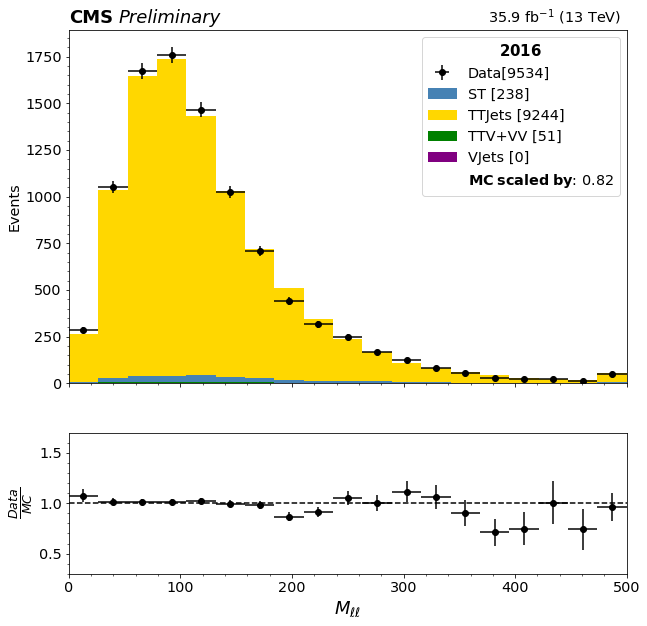

In [66]:
bins = np.linspace(0,500,20)
mc_p_TTJets = Hist1D(mc_c_TTJets.dilep_mass,weights=comb_w_TTJets,bins=bins,label='TTJets ['+str(round(sum(comb_w_TTJets)))+']',color='gold')
mc_p_ST = Hist1D(mc_c_ST.dilep_mass,weights=comb_w_ST,bins=bins,label='ST ['+str(round(sum(comb_w_ST)))+']',color='steelblue')
mc_p_VV = Hist1D(mc_c_VV.dilep_mass,weights=comb_w_VV,bins=bins,label='VV ['+str(round(sum(comb_w_VV)))+']',color='red')
mc_p_TTV = Hist1D(mc_c_TTV.dilep_mass,weights=comb_w_TTV,bins=bins,label='TTV+VV ['+str(round(sum(comb_w_TTV) + sum(comb_w_VV)))+']',color='green')
mc_p_VJets = Hist1D(mc_c_VJets.dilep_mass,weights=comb_w_VJets,bins=bins,label='VJets ['+str(round(sum(comb_w_VJets)))+']',color='purple')
data_p = Hist1D(data_c.dilep_mass,bins=bins,label='Data['+str(len(data_c))+']',color='black')
mc_p_TV = mc_p_TTV + mc_p_VV
one = np.ones(50)
one_x = np.linspace(0,500)
#Plot
fig,(ax1,ax2) = plt.subplots(2,sharex=True,figsize=(10,10),gridspec_kw=dict(height_ratios=[5, 2]))
plot_stack([mc_p_VJets, mc_p_TV, mc_p_ST, mc_p_TTJets], ax=ax1, histtype='bar')
ax1.set_ylabel("Events")
ax2.set_xlabel(r"$M_{\ell\ell}$",fontsize=18)
ax1.yaxis.set_minor_locator(AutoMinorLocator())
data_p.plot(ax=ax1,show_errors=True)
(data_p/(mc_p_TTJets+mc_p_ST+mc_p_TV+mc_p_VJets)).plot(ax=ax2,show_errors=True,label='')
ax2.set_ylabel(r"$\frac{Data}{MC}$",fontsize=18)
ax2.set_ylim(0.3,1.7)
ax2.yaxis.set_minor_locator(AutoMinorLocator())
plt.plot(one_x,one,'k--')
ax1.plot([],[],' ',label=r"$\bf{MC\hspace{0.25} scaled\hspace{0.25} by}$: %0.2f" % integral_w)
handles, labels = ax1.get_legend_handles_labels()
# sort both labels and handles by labels
labels, handles = zip(*sorted(zip(labels, handles), key=lambda t: t[0]))
labels, handles = list(labels), list(handles)
labels.append(labels.pop(0))
handles.append(handles.pop(0))
labels = tuple(labels)
handles = tuple(handles)
ax1.legend(handles, labels, title=r'$\bf{}$'.format(str(year_)),title_fontsize=15)
ax1.text(0.0, 1.01,"CMS", horizontalalignment="left", verticalalignment="bottom", transform=ax1.transAxes, weight="bold", size=18)
ax1.text(0.09, 1.01, "Preliminary", horizontalalignment="left", verticalalignment="bottom", transform=ax1.transAxes, style="italic", size=18)
ax1.text(0.99, 1.01,"%0.1f fb${}^\mathregular{-1}$ (13 TeV)" % (mc_c_TTJets.int_lumi.iloc[0] / 1000), horizontalalignment='right', verticalalignment='bottom', transform = ax1.transAxes, size="x-large")
ax1.xaxis.set_minor_locator(AutoMinorLocator())
ax2.xaxis.set_minor_locator(AutoMinorLocator())

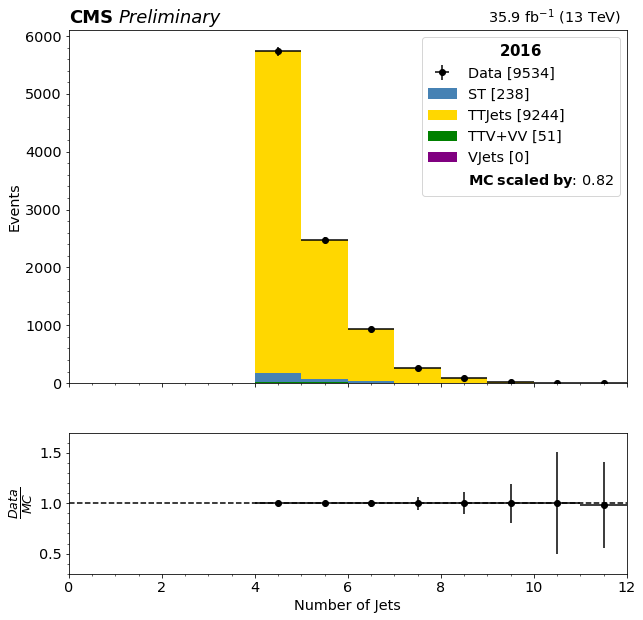

In [67]:
bins = np.linspace(0,12,13)
mc_p_TTJets = Hist1D(mc_c_TTJets.num_jets,weights=comb_w_TTJets,bins=bins,label='TTJets ['+str(round(sum(comb_w_TTJets)))+']',color='gold')
mc_p_ST = Hist1D(mc_c_ST.num_jets,weights=comb_w_ST,bins=bins,label='ST ['+str(round(sum(comb_w_ST)))+']',color='steelblue')
mc_p_VV = Hist1D(mc_c_VV.num_jets,weights=comb_w_VV,bins=bins,label='VV ['+str(round(sum(comb_w_VV)))+']',color='red')
mc_p_TTV = Hist1D(mc_c_TTV.num_jets,weights=comb_w_TTV,bins=bins,label='TTV+VV ['+str(round(sum(comb_w_TTV) + sum(comb_w_VV)))+']',color='green')
mc_p_VJets = Hist1D(mc_c_VJets.num_jets,weights=comb_w_VJets,bins=bins,label='VJets ['+str(round(sum(comb_w_VJets)))+']',color='purple')
data_p = Hist1D(data_c.num_jets,bins=bins,label='Data ['+str(len(data_c))+']',color='black')
mc_p_TV = mc_p_TTV + mc_p_VV
one = np.ones(50)
one_x = np.linspace(0,12)
#Plot
fig,(ax1,ax2) = plt.subplots(2,sharex=True,figsize=(10,10),gridspec_kw=dict(height_ratios=[5, 2]))
plot_stack([mc_p_VJets, mc_p_TV, mc_p_ST, mc_p_TTJets], ax=ax1, histtype='bar')
ax1.set_ylabel("Events")
ax2.set_xlabel(r"Number of Jets")
ax1.yaxis.set_minor_locator(AutoMinorLocator())
data_p.plot(ax=ax1,show_errors=True)
(data_p/(mc_p_TTJets+mc_p_ST+mc_p_TV+mc_p_VJets)).plot(ax=ax2,show_errors=True,label='')
ax2.set_ylabel(r"$\frac{Data}{MC}$",fontsize=18)
ax2.set_ylim(0.3,1.7)
ax2.yaxis.set_minor_locator(AutoMinorLocator())
plt.plot(one_x,one,'k--')
ax1.plot([],[],' ',label=r"$\bf{MC\hspace{0.25} scaled\hspace{0.25} by}$: %0.2f" % integral_w)
handles, labels = ax1.get_legend_handles_labels()
# sort both labels and handles by labels
labels, handles = zip(*sorted(zip(labels, handles), key=lambda t: t[0]))
labels, handles = list(labels), list(handles)
labels.append(labels.pop(0))
handles.append(handles.pop(0))
labels = tuple(labels)
handles = tuple(handles)
ax1.legend(handles, labels, title=r'$\bf{}$'.format(str(year_)),title_fontsize=15)
ax1.text(0.0, 1.01,"CMS", horizontalalignment="left", verticalalignment="bottom", transform=ax1.transAxes, weight="bold", size=18)
ax1.text(0.09, 1.01, "Preliminary", horizontalalignment="left", verticalalignment="bottom", transform=ax1.transAxes, style="italic", size=18)
ax1.text(0.99, 1.01,"%0.1f fb${}^\mathregular{-1}$ (13 TeV)" % (mc_c_TTJets.int_lumi.iloc[0] / 1000), horizontalalignment='right', verticalalignment='bottom', transform = ax1.transAxes, size="x-large")
ax1.xaxis.set_minor_locator(AutoMinorLocator())
ax2.xaxis.set_minor_locator(AutoMinorLocator())

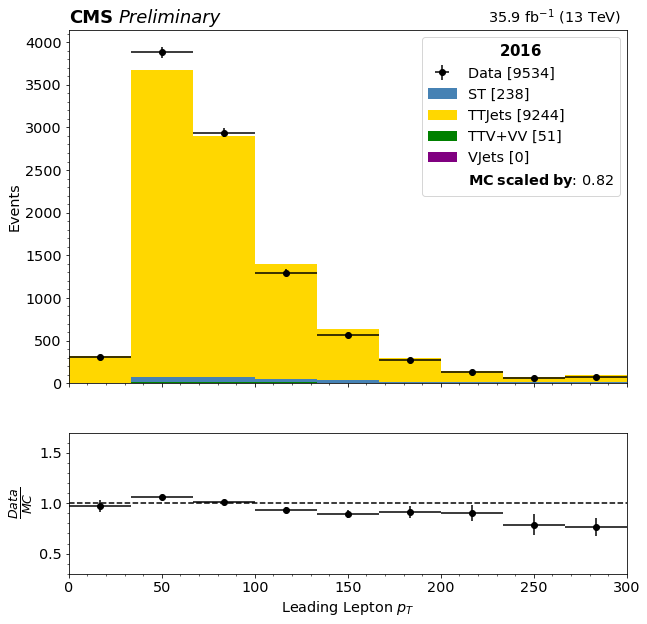

In [68]:
bins = np.linspace(0,300,10)
mc_p_TTJets = Hist1D(mc_c_TTJets.leading_lep_pt,weights=comb_w_TTJets,bins=bins,label='TTJets ['+str(round(sum(comb_w_TTJets)))+']',color='gold')
mc_p_ST = Hist1D(mc_c_ST.leading_lep_pt,weights=comb_w_ST,bins=bins,label='ST ['+str(round(sum(comb_w_ST)))+']',color='steelblue')
mc_p_VV = Hist1D(mc_c_VV.leading_lep_pt,weights=comb_w_VV,bins=bins,label='VV ['+str(round(sum(comb_w_VV)))+']',color='red')
mc_p_TTV = Hist1D(mc_c_TTV.leading_lep_pt,weights=comb_w_TTV,bins=bins,label='TTV+VV ['+str(round(sum(comb_w_TTV) + sum(comb_w_VV)))+']',color='green')
mc_p_VJets = Hist1D(mc_c_VJets.leading_lep_pt,weights=comb_w_VJets,bins=bins,label='VJets ['+str(round(sum(comb_w_VJets)))+']',color='purple')
data_p = Hist1D(data_c.leading_lep_pt,bins=bins,label='Data ['+str(len(data_c))+']',color='black')
mc_p_TV = mc_p_TTV + mc_p_VV
one = np.ones(50)
one_x = np.linspace(0,300)
#Plot
fig,(ax1,ax2) = plt.subplots(2,sharex=True,figsize=(10,10),gridspec_kw=dict(height_ratios=[5, 2]))
plot_stack([mc_p_VJets, mc_p_TV, mc_p_ST, mc_p_TTJets], ax=ax1, histtype='bar')
ax1.set_ylabel("Events")
ax2.set_xlabel(r"Leading Lepton $p_T$")
ax1.yaxis.set_minor_locator(AutoMinorLocator())
data_p.plot(ax=ax1,show_errors=True)
(data_p/(mc_p_TTJets+mc_p_ST+mc_p_TV+mc_p_VJets)).plot(ax=ax2,show_errors=True,label='')
ax2.set_ylabel(r"$\frac{Data}{MC}$",fontsize=18)
ax2.set_ylim(0.3,1.7)
ax2.yaxis.set_minor_locator(AutoMinorLocator())
plt.plot(one_x,one,'k--')
ax1.plot([],[],' ',label=r"$\bf{MC\hspace{0.25} scaled\hspace{0.25} by}$: %0.2f" % integral_w)
handles, labels = ax1.get_legend_handles_labels()
# sort both labels and handles by labels
labels, handles = zip(*sorted(zip(labels, handles), key=lambda t: t[0]))
labels, handles = list(labels), list(handles)
labels.append(labels.pop(0))
handles.append(handles.pop(0))
labels = tuple(labels)
handles = tuple(handles)
ax1.legend(handles, labels, title=r'$\bf{}$'.format(str(year_)),title_fontsize=15)
ax1.text(0.0, 1.01,"CMS", horizontalalignment="left", verticalalignment="bottom", transform=ax1.transAxes, weight="bold", size=18)
ax1.text(0.09, 1.01, "Preliminary", horizontalalignment="left", verticalalignment="bottom", transform=ax1.transAxes, style="italic", size=18)
ax1.text(0.99, 1.01,"%0.1f fb${}^\mathregular{-1}$ (13 TeV)" % (mc_c_TTJets.int_lumi.iloc[0] / 1000), horizontalalignment='right', verticalalignment='bottom', transform = ax1.transAxes, size="x-large")
ax1.xaxis.set_minor_locator(AutoMinorLocator())
ax2.xaxis.set_minor_locator(AutoMinorLocator())

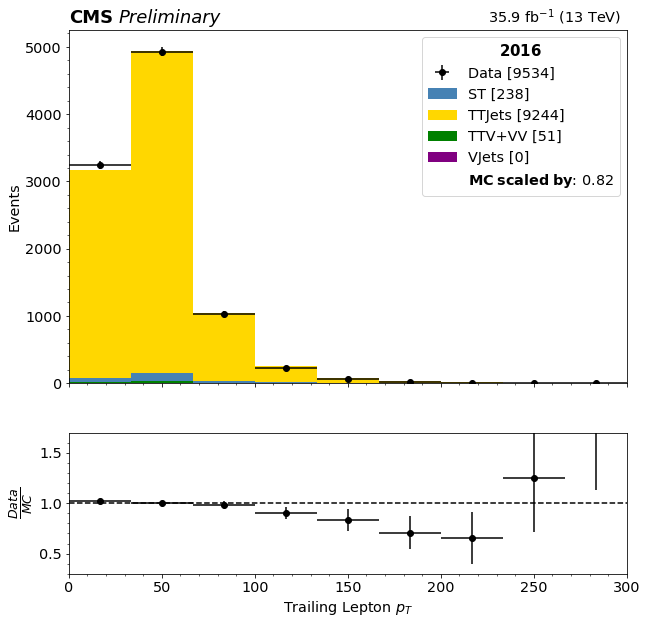

In [69]:
bins = np.linspace(0,300,10)
mc_p_TTJets = Hist1D(mc_c_TTJets.trailing_lep_pt,weights=comb_w_TTJets,bins=bins,label='TTJets ['+str(round(sum(comb_w_TTJets)))+']',color='gold')
mc_p_ST = Hist1D(mc_c_ST.trailing_lep_pt,weights=comb_w_ST,bins=bins,label='ST ['+str(round(sum(comb_w_ST)))+']',color='steelblue')
mc_p_VV = Hist1D(mc_c_VV.trailing_lep_pt,weights=comb_w_VV,bins=bins,label='VV ['+str(round(sum(comb_w_VV)))+']',color='red')
mc_p_TTV = Hist1D(mc_c_TTV.trailing_lep_pt,weights=comb_w_TTV,bins=bins,label='TTV+VV ['+str(round(sum(comb_w_TTV) + sum(comb_w_VV)))+']',color='green')
mc_p_VJets = Hist1D(mc_c_VJets.trailing_lep_pt,weights=comb_w_VJets,bins=bins,label='VJets ['+str(round(sum(comb_w_VJets)))+']',color='purple')
data_p = Hist1D(data_c.trailing_lep_pt,bins=bins,label='Data ['+str(len(data_c))+']',color='black')
mc_p_TV = mc_p_TTV + mc_p_VV
one = np.ones(50)
one_x = np.linspace(0,300)
#Plot
fig,(ax1,ax2) = plt.subplots(2,sharex=True,figsize=(10,10),gridspec_kw=dict(height_ratios=[5, 2]))
plot_stack([mc_p_VJets, mc_p_TV, mc_p_ST, mc_p_TTJets], ax=ax1, histtype='bar')
ax1.set_ylabel("Events")
ax2.set_xlabel(r"Trailing Lepton $p_T$")
ax1.yaxis.set_minor_locator(AutoMinorLocator())
data_p.plot(ax=ax1,show_errors=True)
(data_p/(mc_p_TTJets+mc_p_ST+mc_p_TV+mc_p_VJets)).plot(ax=ax2,show_errors=True,label='')
ax2.set_ylabel(r"$\frac{Data}{MC}$",fontsize=18)
ax2.set_ylim(0.3,1.7)
ax2.yaxis.set_minor_locator(AutoMinorLocator())
plt.plot(one_x,one,'k--')
ax1.plot([],[],' ',label=r"$\bf{MC\hspace{0.25} scaled\hspace{0.25} by}$: %0.2f" % integral_w)
handles, labels = ax1.get_legend_handles_labels()
# sort both labels and handles by labels
labels, handles = zip(*sorted(zip(labels, handles), key=lambda t: t[0]))
labels, handles = list(labels), list(handles)
labels.append(labels.pop(0))
handles.append(handles.pop(0))
labels = tuple(labels)
handles = tuple(handles)
ax1.legend(handles, labels, title=r'$\bf{}$'.format(str(year_)),title_fontsize=15)
ax1.text(0.0, 1.01,"CMS", horizontalalignment="left", verticalalignment="bottom", transform=ax1.transAxes, weight="bold", size=18)
ax1.text(0.09, 1.01, "Preliminary", horizontalalignment="left", verticalalignment="bottom", transform=ax1.transAxes, style="italic", size=18)
ax1.text(0.99, 1.01,"%0.1f fb${}^\mathregular{-1}$ (13 TeV)" % (mc_c_TTJets.int_lumi.iloc[0] / 1000), horizontalalignment='right', verticalalignment='bottom', transform = ax1.transAxes, size="x-large")
ax1.xaxis.set_minor_locator(AutoMinorLocator())
ax2.xaxis.set_minor_locator(AutoMinorLocator())

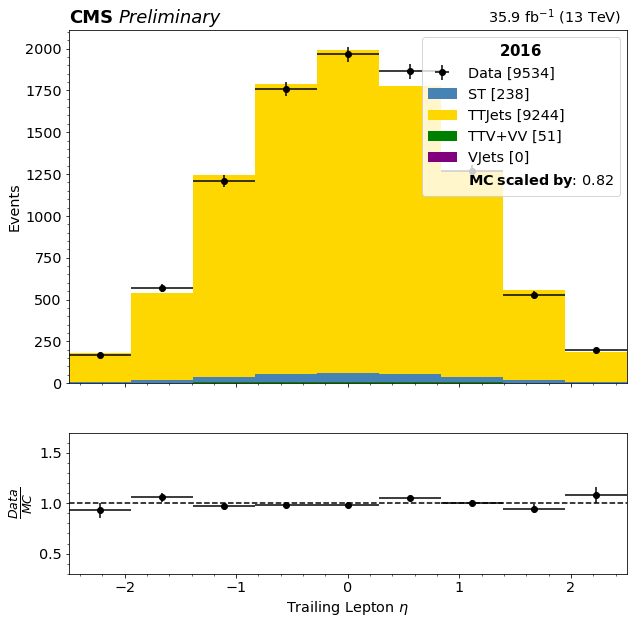

In [70]:
bins = np.linspace(-2.5,2.5,10)
mc_p_TTJets = Hist1D(mc_c_TTJets.leading_lep_eta,weights=comb_w_TTJets,bins=bins,label='TTJets ['+str(round(sum(comb_w_TTJets)))+']',color='gold') 
mc_p_ST = Hist1D(mc_c_ST.leading_lep_eta,weights=comb_w_ST,bins=bins,label='ST ['+str(round(sum(comb_w_ST)))+']',color='steelblue')
mc_p_VV = Hist1D(mc_c_VV.leading_lep_eta,weights=comb_w_VV,bins=bins,label='VV ['+str(round(sum(comb_w_VV)))+']',color='red')
mc_p_TTV = Hist1D(mc_c_TTV.leading_lep_eta,weights=comb_w_TTV,bins=bins,label='TTV+VV ['+str(round(sum(comb_w_TTV) + sum(comb_w_VV)))+']',color='green')
mc_p_VJets = Hist1D(mc_c_VJets.leading_lep_eta,weights=comb_w_VJets,bins=bins,label='VJets ['+str(round(sum(comb_w_VJets)))+']',color='purple')
data_p = Hist1D(data_c.leading_lep_eta,bins=bins,label='Data ['+str(len(data_c))+']',color='black')
mc_p_TV = mc_p_TTV + mc_p_VV
one = np.ones(50)
one_x = np.linspace(-2.5,2.5)
#Plot
fig,(ax1,ax2) = plt.subplots(2,sharex=True,figsize=(10,10),gridspec_kw=dict(height_ratios=[5, 2]))
plot_stack([mc_p_VJets, mc_p_TV, mc_p_ST, mc_p_TTJets], ax=ax1, histtype='bar')
ax1.set_ylabel("Events")
ax2.set_xlabel(r"Trailing Lepton $\eta$")
ax1.yaxis.set_minor_locator(AutoMinorLocator())
data_p.plot(ax=ax1,show_errors=True)
(data_p/(mc_p_TTJets+mc_p_ST+mc_p_TV+mc_p_VJets)).plot(ax=ax2,show_errors=True,label='')
ax2.set_ylabel(r"$\frac{Data}{MC}$",fontsize=18)
ax2.set_ylim(0.3,1.7)
ax2.yaxis.set_minor_locator(AutoMinorLocator())
plt.plot(one_x,one,'k--')
ax1.plot([],[],' ',label=r"$\bf{MC\hspace{0.25} scaled\hspace{0.25} by}$: %0.2f" % integral_w)
handles, labels = ax1.get_legend_handles_labels()
# sort both labels and handles by labels
labels, handles = zip(*sorted(zip(labels, handles), key=lambda t: t[0]))
labels, handles = list(labels), list(handles)
labels.append(labels.pop(0))
handles.append(handles.pop(0))
labels = tuple(labels)
handles = tuple(handles)
ax1.legend(handles, labels, title=r'$\bf{}$'.format(str(year_)),title_fontsize=15)
ax1.text(0.0, 1.01,"CMS", horizontalalignment="left", verticalalignment="bottom", transform=ax1.transAxes, weight="bold", size=18)
ax1.text(0.09, 1.01, "Preliminary", horizontalalignment="left", verticalalignment="bottom", transform=ax1.transAxes, style="italic", size=18)
ax1.text(0.99, 1.01,"%0.1f fb${}^\mathregular{-1}$ (13 TeV)" % (mc_c_TTJets.int_lumi.iloc[0] / 1000), horizontalalignment='right', verticalalignment='bottom', transform = ax1.transAxes, size="x-large")
ax1.xaxis.set_minor_locator(AutoMinorLocator())
ax2.xaxis.set_minor_locator(AutoMinorLocator())

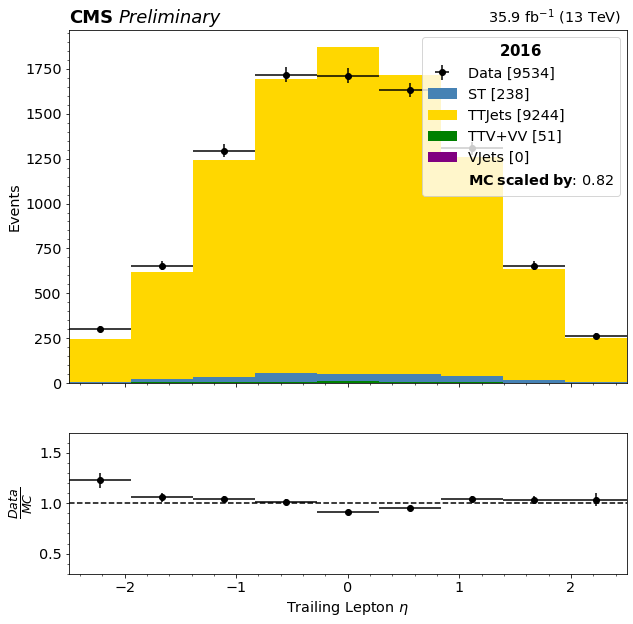

In [71]:
bins = np.linspace(-2.5,2.5,10)
mc_p_TTJets = Hist1D(mc_c_TTJets.trailing_lep_eta,weights=comb_w_TTJets,bins=bins,label='TTJets ['+str(round(sum(comb_w_TTJets)))+']',color='gold')
mc_p_ST = Hist1D(mc_c_ST.trailing_lep_eta,weights=comb_w_ST,bins=bins,label='ST ['+str(round(sum(comb_w_ST)))+']',color='steelblue')
mc_p_VV = Hist1D(mc_c_VV.trailing_lep_eta,weights=comb_w_VV,bins=bins,label='VV ['+str(round(sum(comb_w_VV)))+']',color='red')
mc_p_TTV = Hist1D(mc_c_TTV.trailing_lep_eta,weights=comb_w_TTV,bins=bins,label='TTV+VV ['+str(round(sum(comb_w_TTV) + sum(comb_w_VV)))+']',color='green')
mc_p_VJets = Hist1D(mc_c_VJets.trailing_lep_eta,weights=comb_w_VJets,bins=bins,label='VJets ['+str(round(sum(comb_w_VJets)))+']',color='purple')
data_p = Hist1D(data_c.trailing_lep_eta,bins=bins,label='Data ['+str(len(data_c))+']',color='black')
mc_p_TV = mc_p_TTV + mc_p_VV
one = np.ones(50)
one_x = np.linspace(-2.5,2.5)
#Plot
fig,(ax1,ax2) = plt.subplots(2,sharex=True,figsize=(10,10),gridspec_kw=dict(height_ratios=[5, 2]))
plot_stack([mc_p_VJets, mc_p_TV, mc_p_ST, mc_p_TTJets], ax=ax1, histtype='bar')
ax1.set_ylabel("Events")
ax2.set_xlabel(r"Trailing Lepton $\eta$")
ax1.yaxis.set_minor_locator(AutoMinorLocator())
data_p.plot(ax=ax1,show_errors=True)
(data_p/(mc_p_TTJets+mc_p_ST+mc_p_TV+mc_p_VJets)).plot(ax=ax2,show_errors=True,label='')
ax2.set_ylabel(r"$\frac{Data}{MC}$",fontsize=18)
ax2.set_ylim(0.3,1.7)
ax2.yaxis.set_minor_locator(AutoMinorLocator())
plt.plot(one_x,one,'k--')
ax1.plot([],[],' ',label=r"$\bf{MC\hspace{0.25} scaled\hspace{0.25} by}$: %0.2f" % integral_w)
handles, labels = ax1.get_legend_handles_labels()
# sort both labels and handles by labels
labels, handles = zip(*sorted(zip(labels, handles), key=lambda t: t[0]))
labels, handles = list(labels), list(handles)
labels.append(labels.pop(0))
handles.append(handles.pop(0))
labels = tuple(labels)
handles = tuple(handles)
ax1.legend(handles, labels, title=r'$\bf{}$'.format(str(year_)),title_fontsize=15)
ax1.text(0.0, 1.01,"CMS", horizontalalignment="left", verticalalignment="bottom", transform=ax1.transAxes, weight="bold", size=18)
ax1.text(0.09, 1.01, "Preliminary", horizontalalignment="left", verticalalignment="bottom", transform=ax1.transAxes, style="italic", size=18)
ax1.text(0.99, 1.01,"%0.1f fb${}^\mathregular{-1}$ (13 TeV)" % (mc_c_TTJets.int_lumi.iloc[0] / 1000), horizontalalignment='right', verticalalignment='bottom', transform = ax1.transAxes, size="x-large")
ax1.xaxis.set_minor_locator(AutoMinorLocator())
ax2.xaxis.set_minor_locator(AutoMinorLocator())

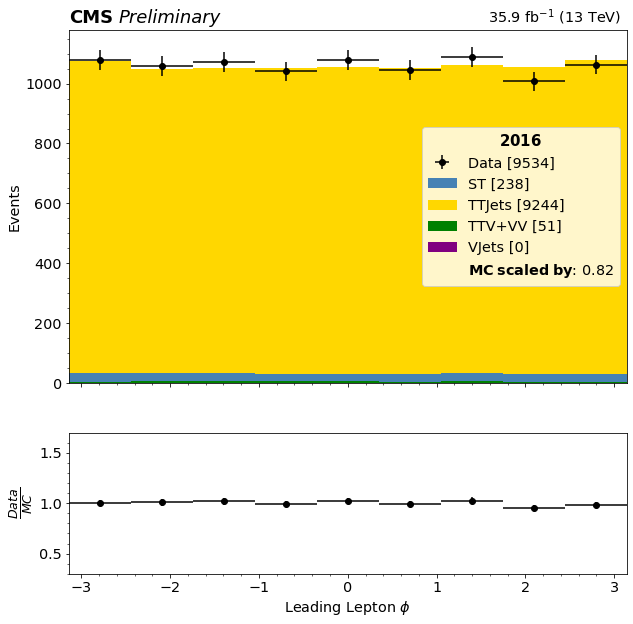

In [72]:
bins = np.linspace(-np.pi,np.pi,10)
mc_p_TTJets = Hist1D(mc_c_TTJets.leading_lep_phi,weights=comb_w_TTJets,bins=bins,label='TTJets ['+str(round(sum(comb_w_TTJets)))+']',color='gold')
mc_p_ST = Hist1D(mc_c_ST.leading_lep_phi,weights=comb_w_ST,bins=bins,label='ST ['+str(round(sum(comb_w_ST)))+']',color='steelblue')
mc_p_VV = Hist1D(mc_c_VV.leading_lep_phi,weights=comb_w_VV,bins=bins,label='VV ['+str(round(sum(comb_w_VV)))+']',color='red')
mc_p_TTV = Hist1D(mc_c_TTV.leading_lep_phi,weights=comb_w_TTV,bins=bins,label='TTV+VV ['+str(round(sum(comb_w_TTV) + sum(comb_w_VV)))+']',color='green')
mc_p_VJets = Hist1D(mc_c_VJets.leading_lep_phi,weights=comb_w_VJets,bins=bins,label='VJets ['+str(round(sum(comb_w_VJets)))+']',color='purple')
data_p = Hist1D(data_c.leading_lep_phi,bins=bins,label='Data ['+str(len(data_c))+']',color='black')
mc_p_TV = mc_p_TTV + mc_p_VV
one = np.ones(50)
one_x = np.linspace(np.pi,np.pi)
#Plot
fig,(ax1,ax2) = plt.subplots(2,sharex=True,figsize=(10,10),gridspec_kw=dict(height_ratios=[5, 2]))
plot_stack([mc_p_VJets, mc_p_TV, mc_p_ST, mc_p_TTJets], ax=ax1, histtype='bar')
ax1.set_ylabel("Events")
ax2.set_xlabel(r"Leading Lepton $\phi$")
ax1.yaxis.set_minor_locator(AutoMinorLocator())
data_p.plot(ax=ax1,show_errors=True)
(data_p/(mc_p_TTJets+mc_p_ST+mc_p_TV+mc_p_VJets)).plot(ax=ax2,show_errors=True,label='')
ax2.set_ylabel(r"$\frac{Data}{MC}$",fontsize=18)
ax2.set_ylim(0.3,1.7)
ax2.yaxis.set_minor_locator(AutoMinorLocator())
plt.plot(one_x,one,'k--')
ax1.plot([],[],' ',label=r"$\bf{MC\hspace{0.25} scaled\hspace{0.25} by}$: %0.2f" % integral_w)
handles, labels = ax1.get_legend_handles_labels()
# sort both labels and handles by labels
labels, handles = zip(*sorted(zip(labels, handles), key=lambda t: t[0]))
labels, handles = list(labels), list(handles)
labels.append(labels.pop(0))
handles.append(handles.pop(0))
labels = tuple(labels)
handles = tuple(handles)
ax1.legend(handles, labels, title=r'$\bf{}$'.format(str(year_)),title_fontsize=15)
ax1.text(0.0, 1.01,"CMS", horizontalalignment="left", verticalalignment="bottom", transform=ax1.transAxes, weight="bold", size=18)
ax1.text(0.09, 1.01, "Preliminary", horizontalalignment="left", verticalalignment="bottom", transform=ax1.transAxes, style="italic", size=18)
ax1.text(0.99, 1.01,"%0.1f fb${}^\mathregular{-1}$ (13 TeV)" % (mc_c_TTJets.int_lumi.iloc[0] / 1000), horizontalalignment='right', verticalalignment='bottom', transform = ax1.transAxes, size="x-large")
ax1.xaxis.set_minor_locator(AutoMinorLocator())
ax2.xaxis.set_minor_locator(AutoMinorLocator())

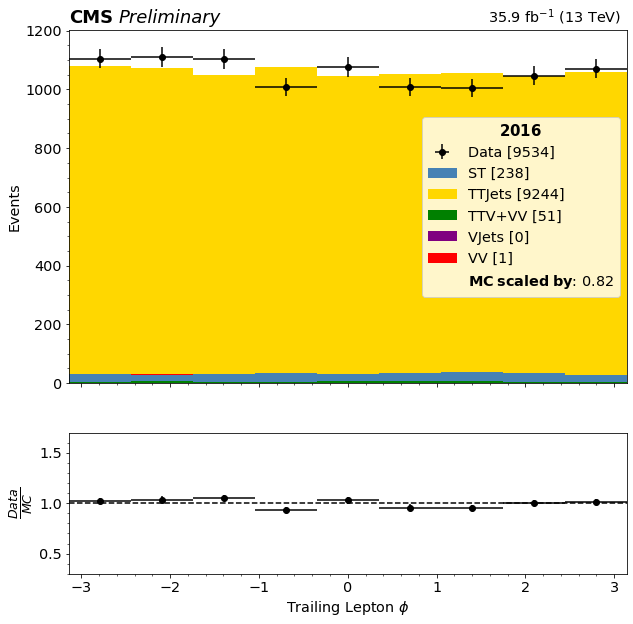

In [73]:
bins = np.linspace(-np.pi,np.pi,10)
mc_p_TTJets = Hist1D(mc_c_TTJets.trailing_lep_phi,weights=comb_w_TTJets,bins=bins,label='TTJets ['+str(round(sum(comb_w_TTJets)))+']',color='gold')
mc_p_ST = Hist1D(mc_c_ST.trailing_lep_phi,weights=comb_w_ST,bins=bins,label='ST ['+str(round(sum(comb_w_ST)))+']',color='steelblue')
mc_p_VV = Hist1D(mc_c_VV.trailing_lep_phi,weights=comb_w_VV,bins=bins,label='VV ['+str(round(sum(comb_w_VV)))+']',color='red')
mc_p_TTV = Hist1D(mc_c_TTV.trailing_lep_phi,weights=comb_w_TTV,bins=bins,label='TTV+VV ['+str(round(sum(comb_w_TTV) + sum(comb_w_VV)))+']',color='green')
mc_p_VJets = Hist1D(mc_c_VJets.trailing_lep_phi,weights=comb_w_VJets,bins=bins,label='VJets ['+str(round(sum(comb_w_VJets)))+']',color='purple')
data_p = Hist1D(data_c.trailing_lep_phi,bins=bins,label='Data ['+str(len(data_c))+']',color='black')
mc_p_TV = mc_p_TTV + mc_p_VV
one = np.ones(50)
one_x = np.linspace(-np.pi,np.pi)
#Plot
fig,(ax1,ax2) = plt.subplots(2,sharex=True,figsize=(10,10),gridspec_kw=dict(height_ratios=[5, 2]))
plot_stack([mc_p_VJets, mc_p_TTV, mc_p_ST, mc_p_VV, mc_p_TTJets], ax=ax1, histtype='bar')
ax1.set_ylabel("Events")
ax2.set_xlabel(r"Trailing Lepton $\phi$")
ax1.yaxis.set_minor_locator(AutoMinorLocator())
data_p.plot(ax=ax1,show_errors=True)
(data_p/(mc_p_TTJets+mc_p_ST+mc_p_TV+mc_p_VJets)).plot(ax=ax2,show_errors=True,label='')
ax2.set_ylabel(r"$\frac{Data}{MC}$",fontsize=18)
ax2.set_ylim(0.3,1.7)
ax2.yaxis.set_minor_locator(AutoMinorLocator())
plt.plot(one_x,one,'k--')
ax1.plot([],[],' ',label=r"$\bf{MC\hspace{0.25} scaled\hspace{0.25} by}$: %0.2f" % integral_w)
handles, labels = ax1.get_legend_handles_labels()
# sort both labels and handles by labels
labels, handles = zip(*sorted(zip(labels, handles), key=lambda t: t[0]))
labels, handles = list(labels), list(handles)
labels.append(labels.pop(0))
handles.append(handles.pop(0))
labels = tuple(labels)
handles = tuple(handles)
ax1.legend(handles, labels, title=r'$\bf{}$'.format(str(year_)),title_fontsize=15)
ax1.text(0.0, 1.01,"CMS", horizontalalignment="left", verticalalignment="bottom", transform=ax1.transAxes, weight="bold", size=18)
ax1.text(0.09, 1.01, "Preliminary", horizontalalignment="left", verticalalignment="bottom", transform=ax1.transAxes, style="italic", size=18)
ax1.text(0.99, 1.01,"%0.1f fb${}^\mathregular{-1}$ (13 TeV)" % (mc_c_TTJets.int_lumi.iloc[0] / 1000), horizontalalignment='right', verticalalignment='bottom', transform = ax1.transAxes, size="x-large")
ax1.xaxis.set_minor_locator(AutoMinorLocator())
ax2.xaxis.set_minor_locator(AutoMinorLocator())